# About this Kernel
## Objectives:
##### 1. Exploring data and differentiating between employees who are leaving the company and those who have chosen to stay till now.
    This part mainly consists of visualization to get a feel of the distribution for different groups of employees.
##### 2. Find out the important factors which dictate the turnover of the employees.
    This was done using univariate feature selection. Univariate feature selection works by selecting the best features based on univariate statistical tests.
##### 3. Fit prediction models and find out which employees might leave next.
    The models used here are Logistic Regression and Support Vector Machine along with GridSearchCV.
    
##### All the above objectives are divided into two parts.
1. For all employees in general.
2. For highly evaluated employees.

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

%matplotlib inline

In [2]:
#This enables the lines separating the bars in the bar graphs

from matplotlib import rcParams
rcParams['patch.force_edgecolor'] = True
rcParams['patch.facecolor'] = 'b'

# Read Data and get an Overview

In [3]:
df_hr = pd.read_csv('Datasets/HR_comma_sep.csv')

df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df_hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Explore

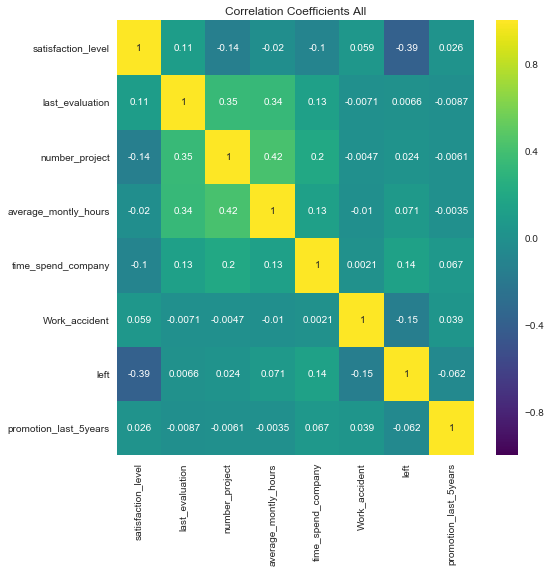

In [6]:
# Let's start the visualization by having a look at the correlation coefficients

plt.figure(figsize=(8,8))
sns.heatmap(data=df_hr.drop('sales', axis=1).corr(), annot=True, cmap='viridis')
plt.title('Correlation Coefficients All')

In [7]:
df_hr_left = df_hr[df_hr['left'] == 1] # seperate dataset for employees who left
df_hr_not_left = df_hr[df_hr['left'] == 0] # separate dataset for employees who didn't leave

# Exploring wrt *satisfaction_level*

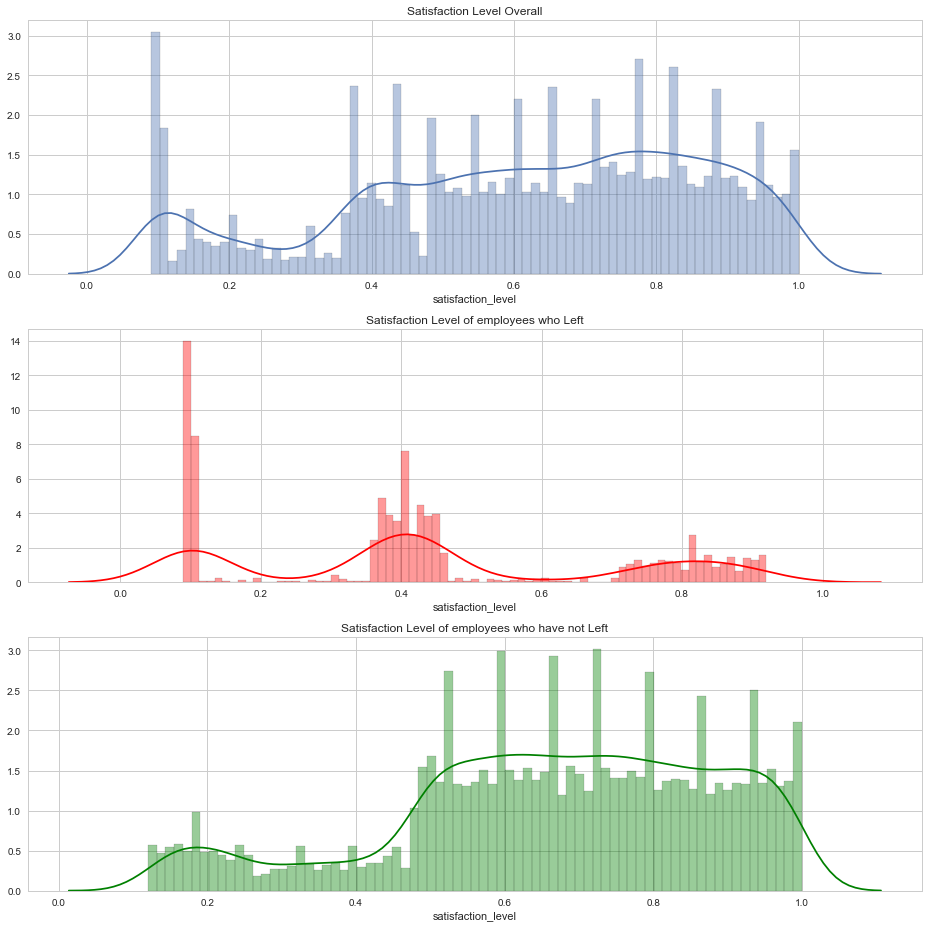

In [8]:
#Let's have a look at the distribution of satisfaction level for different groups of employees

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(13,13))
sns.distplot(df_hr['satisfaction_level'], bins=75, ax=ax1)
ax1.set_title('Satisfaction Level Overall')

sns.distplot(df_hr_left['satisfaction_level'], bins=75, color='red', ax=ax2)
ax2.set_title('Satisfaction Level of employees who Left')

sns.distplot(df_hr_not_left['satisfaction_level'], bins=75, color='green', ax=ax3)
ax3.set_title('Satisfaction Level of employees who have not Left')

plt.tight_layout()

##### We can see that there is a pattern in the above graphs and the pattern is different for different groups of employees

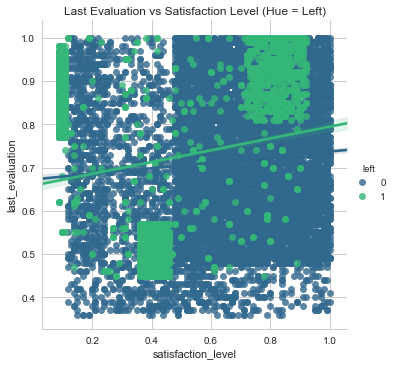

In [9]:
sns.lmplot(x='satisfaction_level', y = 'last_evaluation', hue='left', data=df_hr, palette='viridis')
plt.title('Last Evaluation vs Satisfaction Level (Hue = Left)')

##### We can observe clusters but no such linear relation
1. Employees with *higher evaluation* and *satisfaction* tend to leave.
2. Employees with *higher evaluation* and *lower satisfaction* tend to leave.
3. Employees with *lower evaluation* and *medium satisfaction* tend to leave.

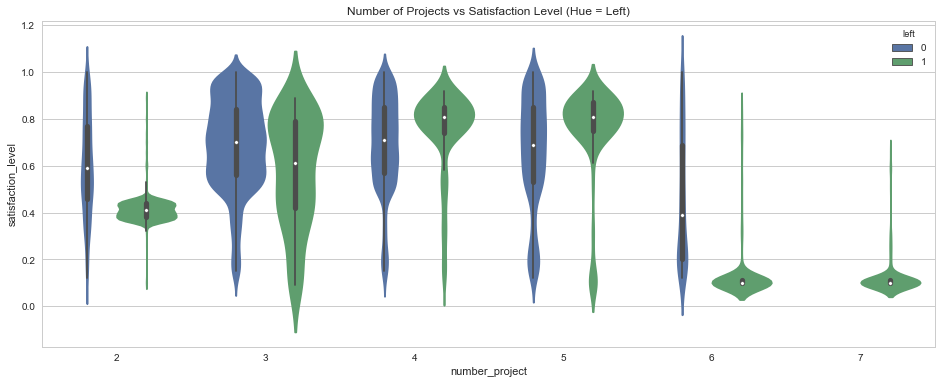

In [10]:
plt.figure(figsize=(16, 6))
sns.violinplot(x='number_project', y='satisfaction_level', data=df_hr, hue='left')
plt.title('Number of Projects vs Satisfaction Level (Hue = Left)')

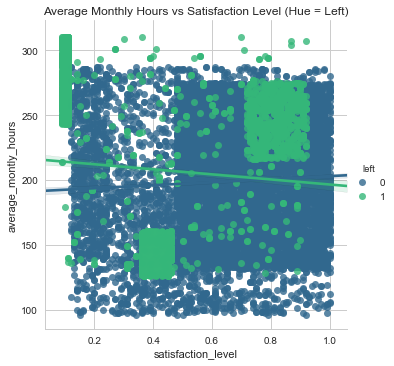

In [11]:
sns.lmplot(x='satisfaction_level', y = 'average_montly_hours', hue='left', data=df_hr, palette='viridis')
plt.title('Average Monthly Hours vs Satisfaction Level (Hue = Left)')

##### We again see the same kind of clusters and so the clusters might mainly be caused by satisfaction

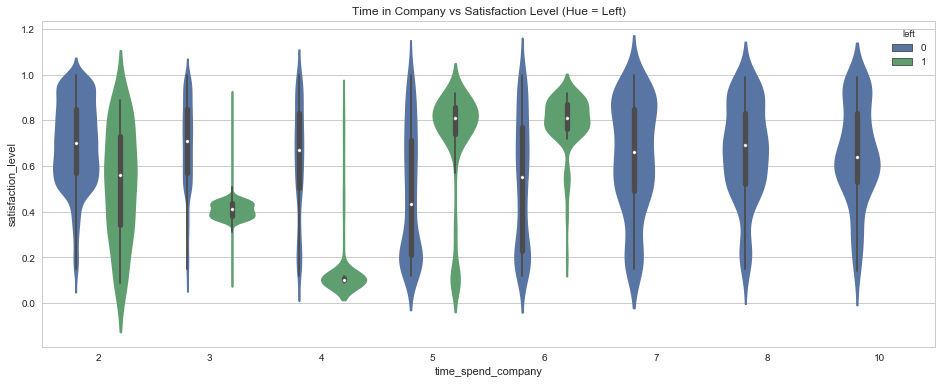

In [12]:
plt.figure(figsize = (16, 6))
sns.violinplot(x='time_spend_company', y='satisfaction_level', data=df_hr, hue='left')
plt.title('Time in Company vs Satisfaction Level (Hue = Left)')

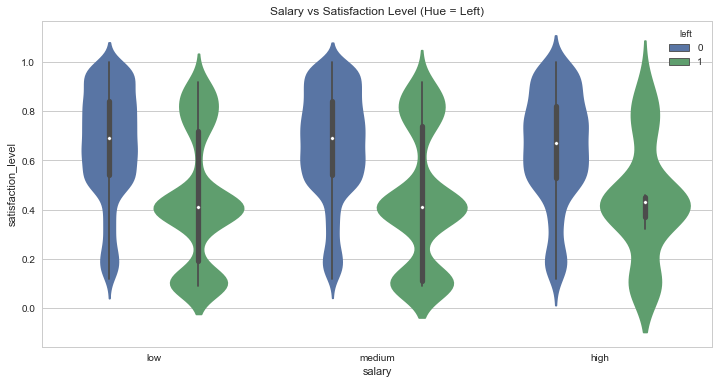

In [13]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='salary', y='satisfaction_level', data=pd.read_csv('Datasets/HR_comma_sep.csv'), hue='left')
plt.title('Salary vs Satisfaction Level (Hue = Left)')

# Explore wrt *number_projects*

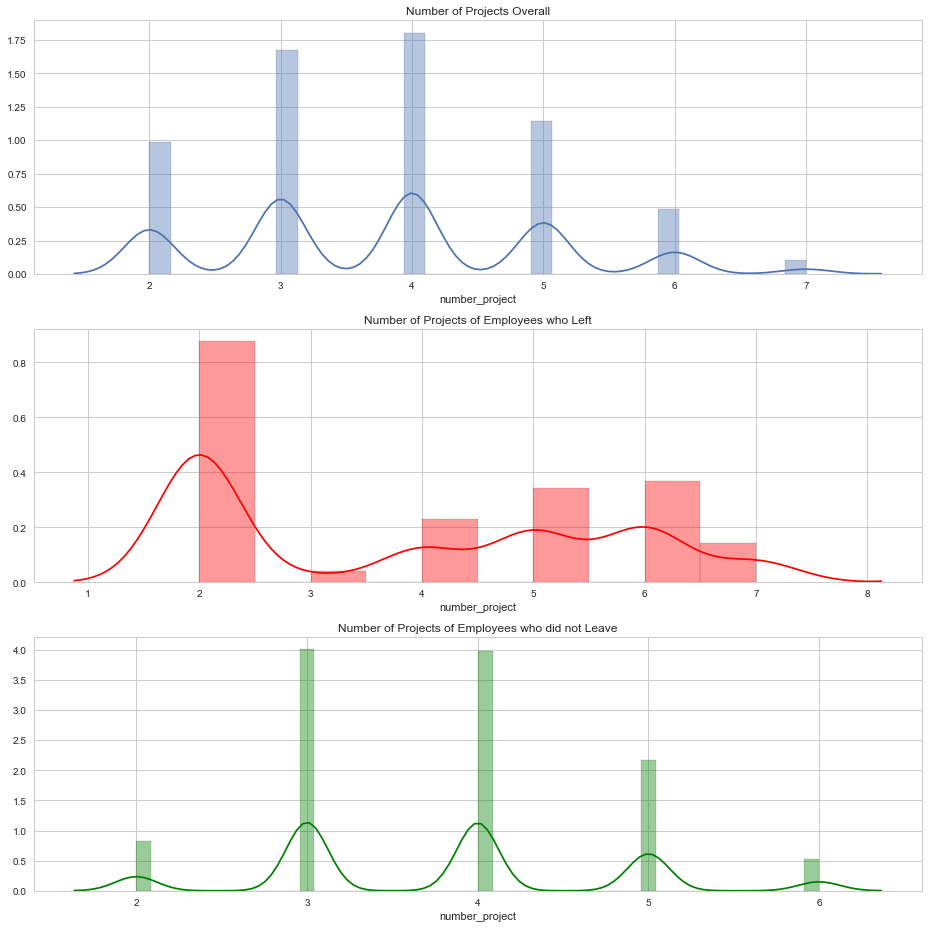

In [14]:
#Let's have a look at the distribution of number of projects level for different groups of employees


fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(13,13))
sns.distplot(df_hr['number_project'], ax=ax1)
ax1.set_title('Number of Projects Overall')

sns.distplot(df_hr_left['number_project'], color='red', ax=ax2)
ax2.set_title('Number of Projects of Employees who Left')

sns.distplot(df_hr_not_left['number_project'], color='green', ax=ax3)
ax3.set_title('Number of Projects of Employees who did not Leave')

plt.tight_layout()

##### We can see that there is a pattern in the above graphs and the pattern is different for different groups of employees.

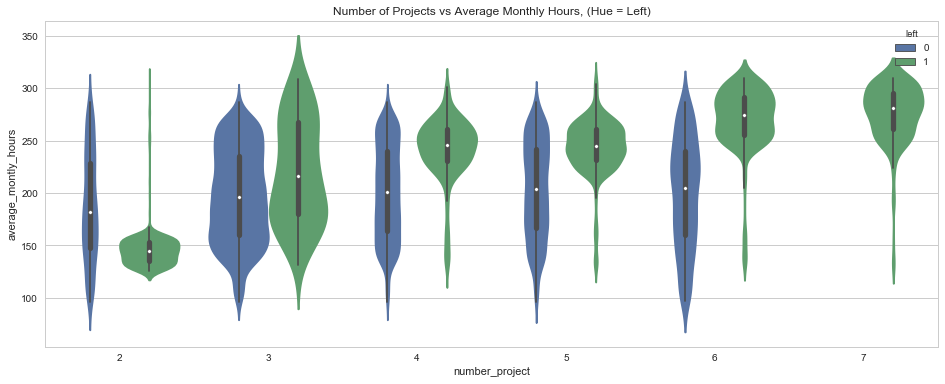

In [15]:
plt.figure(figsize=(16, 6))
sns.violinplot('number_project', 'average_montly_hours', data=df_hr, hue='left')
plt.title('Number of Projects vs Average Monthly Hours, (Hue = Left)')

# Explore wrt *average_montly_hours*

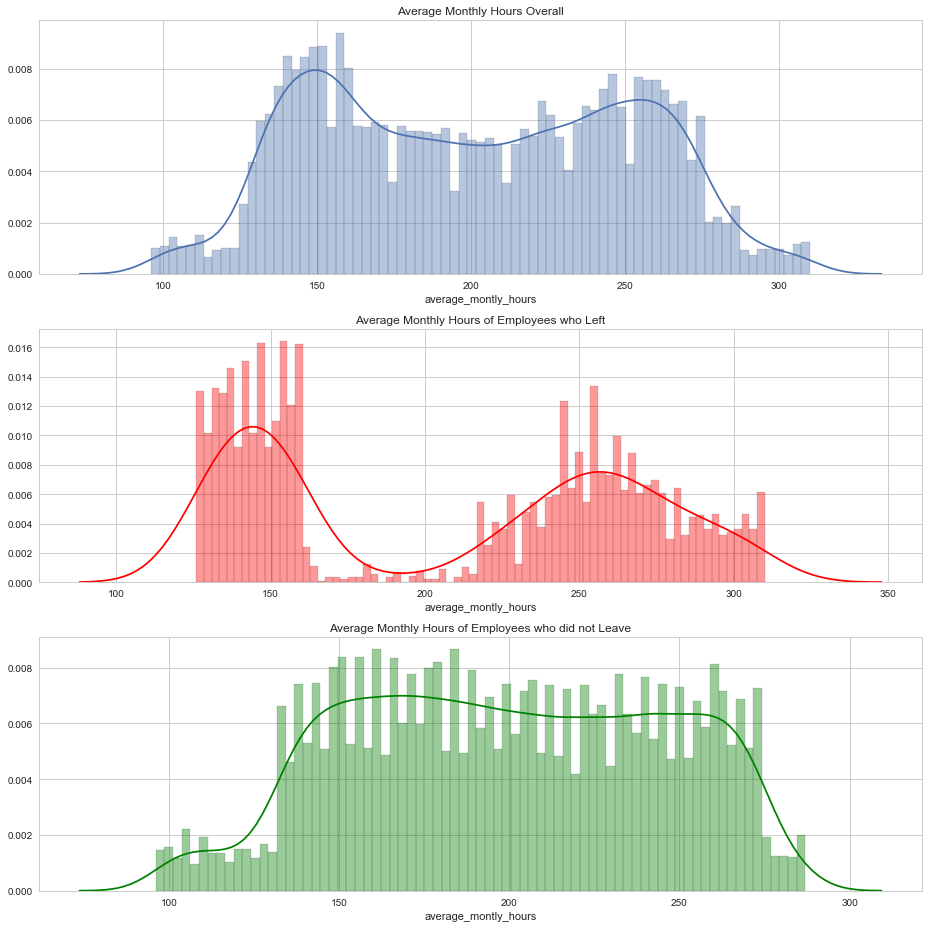

In [16]:
#Let's have a look at the distribution of average monthly hours for different groups of employees

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(13,13))
sns.distplot(df_hr['average_montly_hours'], bins=75, ax=ax1)
ax1.set_title('Average Monthly Hours Overall')

sns.distplot(df_hr_left['average_montly_hours'], bins=75, color='red', ax=ax2)
ax2.set_title('Average Monthly Hours of Employees who Left')

sns.distplot(df_hr_not_left['average_montly_hours'], bins=75, color='green', ax=ax3)
ax3.set_title('Average Monthly Hours of Employees who did not Leave')

plt.tight_layout()

##### We can see that there is a pattern in the above graphs and the pattern is different for different groups of employees.

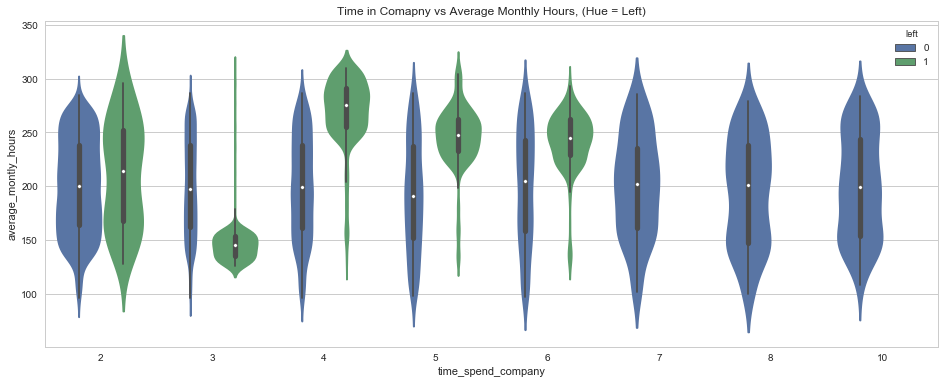

In [17]:
plt.figure(figsize=(16, 6))
sns.violinplot('time_spend_company', 'average_montly_hours', data=df_hr, hue='left')
plt.title('Time in Comapny vs Average Monthly Hours, (Hue = Left)')

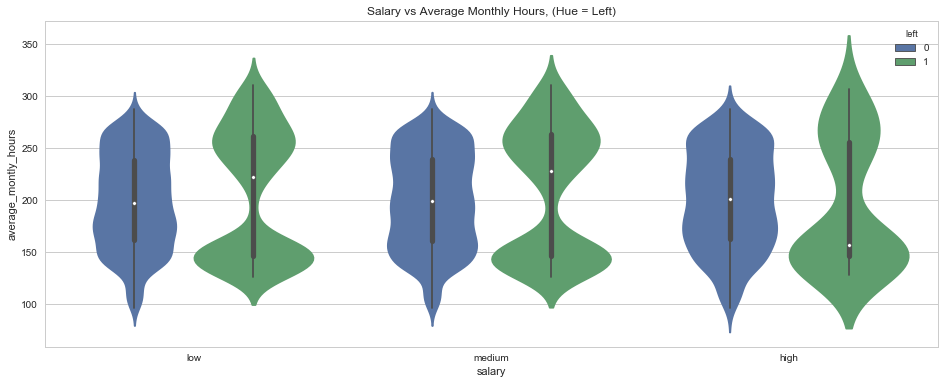

In [18]:
plt.figure(figsize=(16, 6))
sns.violinplot('salary', 'average_montly_hours', data=pd.read_csv('Datasets/HR_comma_sep.csv'), hue='left')
plt.title('Salary vs Average Monthly Hours, (Hue = Left)')

# Explore wrt *time_spend_company*

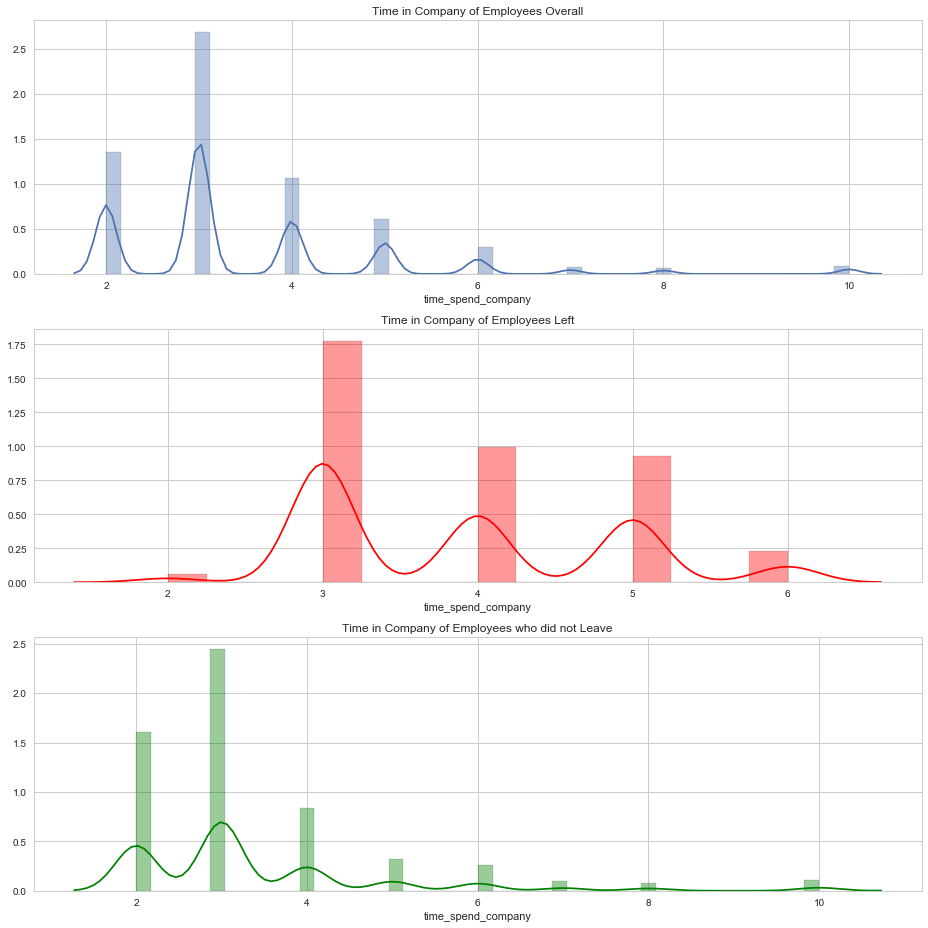

In [19]:
#Let's have a look at the distribution of time in company for different groups of employees

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(13,13))
sns.distplot(df_hr['time_spend_company'], ax=ax1)
ax1.set_title('Time in Company of Employees Overall')

sns.distplot(df_hr_left['time_spend_company'], color='Red', ax=ax2)
ax2.set_title('Time in Company of Employees Left')

sns.distplot(df_hr_not_left['time_spend_company'], color='green', ax=ax3)
ax3.set_title('Time in Company of Employees who did not Leave')

plt.tight_layout()

##### We can see that there is a pattern in the above graphs and the pattern is different for different groups of employees.

# Exploring wrt *Work_accident*

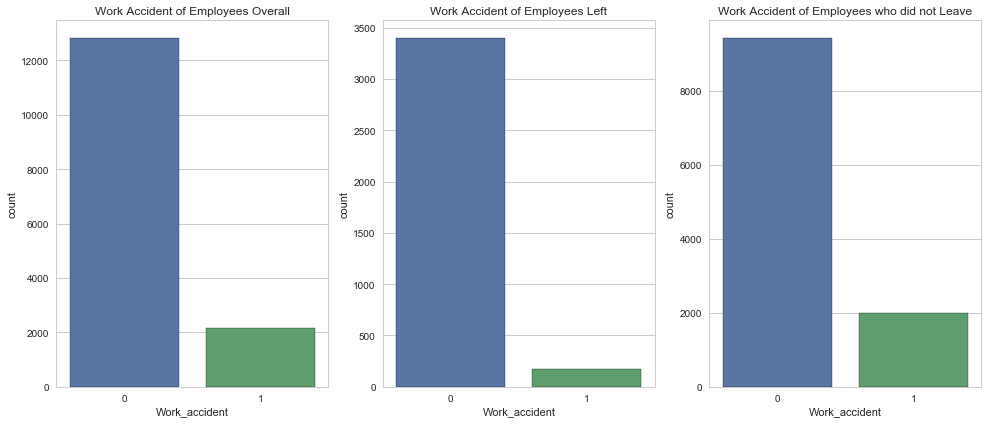

In [20]:
#Let's have a look at the distribution of work accident for different groups of employees


fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(14,6))

sns.countplot(df_hr['Work_accident'], ax=ax1)
ax1.set_title('Work Accident of Employees Overall')

sns.countplot(df_hr_left['Work_accident'], ax=ax2)
ax2.set_title('Work Accident of Employees Left')

sns.countplot(df_hr_not_left['Work_accident'], ax=ax3)
ax3.set_title('Work Accident of Employees who did not Leave')

plt.tight_layout()


##### We can't see a distinct pattern in the above graphs for different groups of employees.

# Exploring wrt *promotion_last_5years*

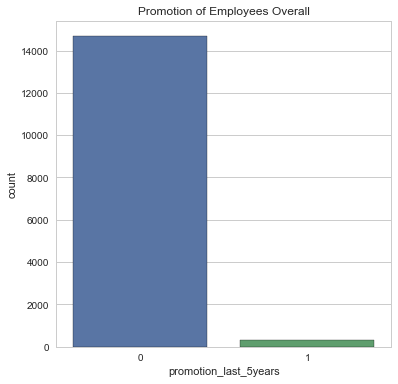

In [21]:
plt.figure(figsize=(6, 6))
sns.countplot(df_hr['promotion_last_5years'])
plt.title('Promotion of Employees Overall')

# Exploring wrt *sales*

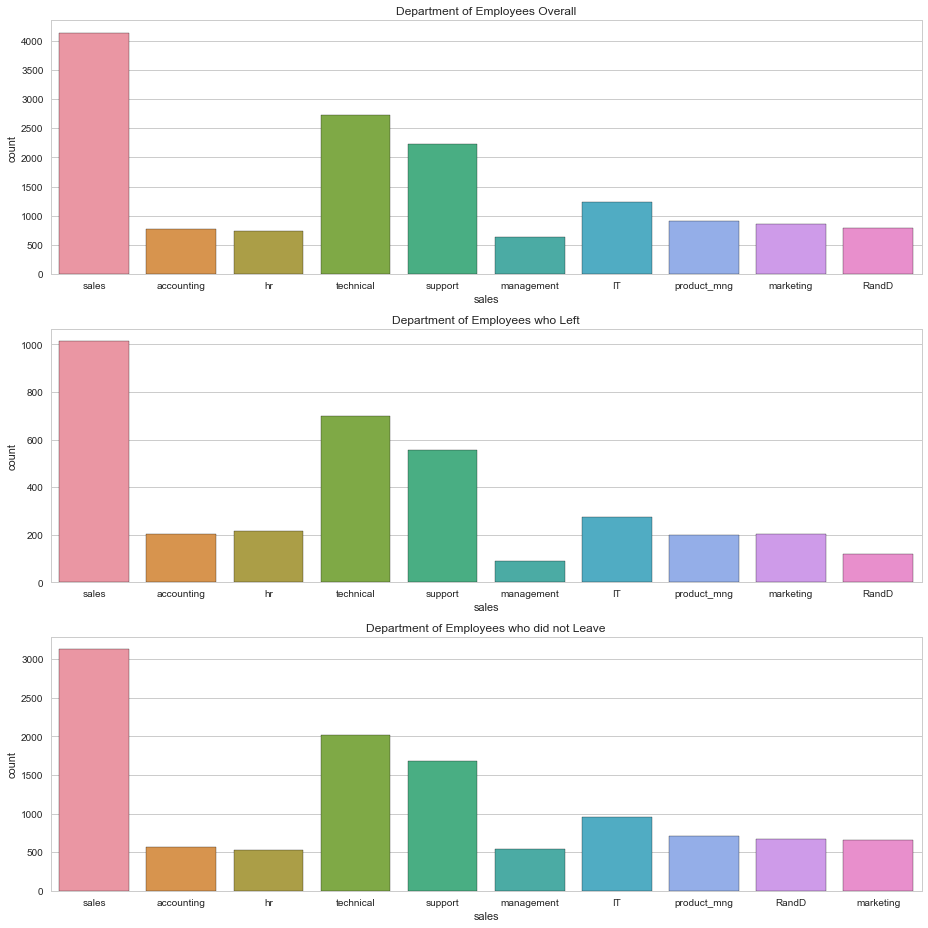

In [22]:
#Let's have a look at the distribution of departments for different groups of employees

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(13,13))

sns.countplot(df_hr['sales'], ax=ax1)
ax1.set_title('Department of Employees Overall')

sns.countplot(df_hr_left['sales'], ax=ax2)
ax2.set_title('Department of Employees who Left')

sns.countplot(df_hr_not_left['sales'], ax=ax3)
ax3.set_title('Department of Employees who did not Leave')

plt.tight_layout()

##### We can't see a distinct pattern in the above graphs for different groups of employees.

# Exploring wrt *salary*

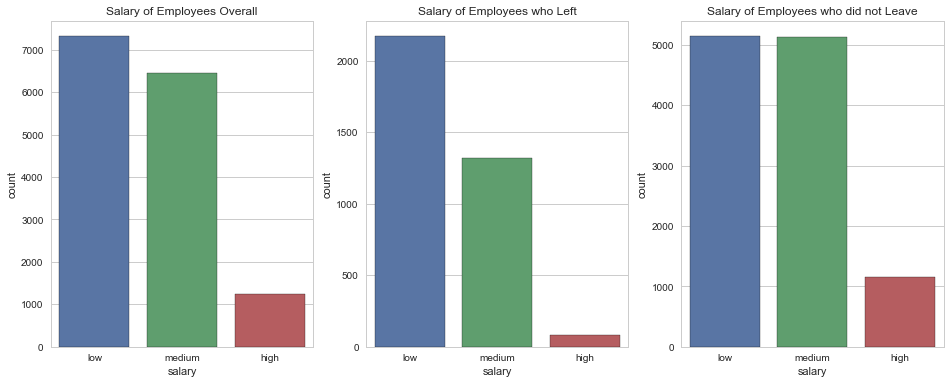

In [23]:
#Let's have a look at the distribution of salary for different groups of employees

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 6))
sns.countplot(pd.read_csv('Datasets/HR_comma_sep.csv')['salary'], ax=ax1)
ax1.set_title('Salary of Employees Overall')

sns.countplot(pd.read_csv('Datasets/HR_comma_sep.csv')['salary'][pd.read_csv('Datasets/HR_comma_sep.csv')['left'] == 1], 
              ax=ax2)
ax2.set_title('Salary of Employees who Left')

sns.countplot(pd.read_csv('Datasets/HR_comma_sep.csv')['salary'][pd.read_csv('Datasets/HR_comma_sep.csv')['left'] == 0], 
              ax=ax3)
ax3.set_title('Salary of Employees who did not Leave')

##### We can't see a distinct pattern in the above graphs for different groups of employees.

# Explore wrt *last_evaluation*

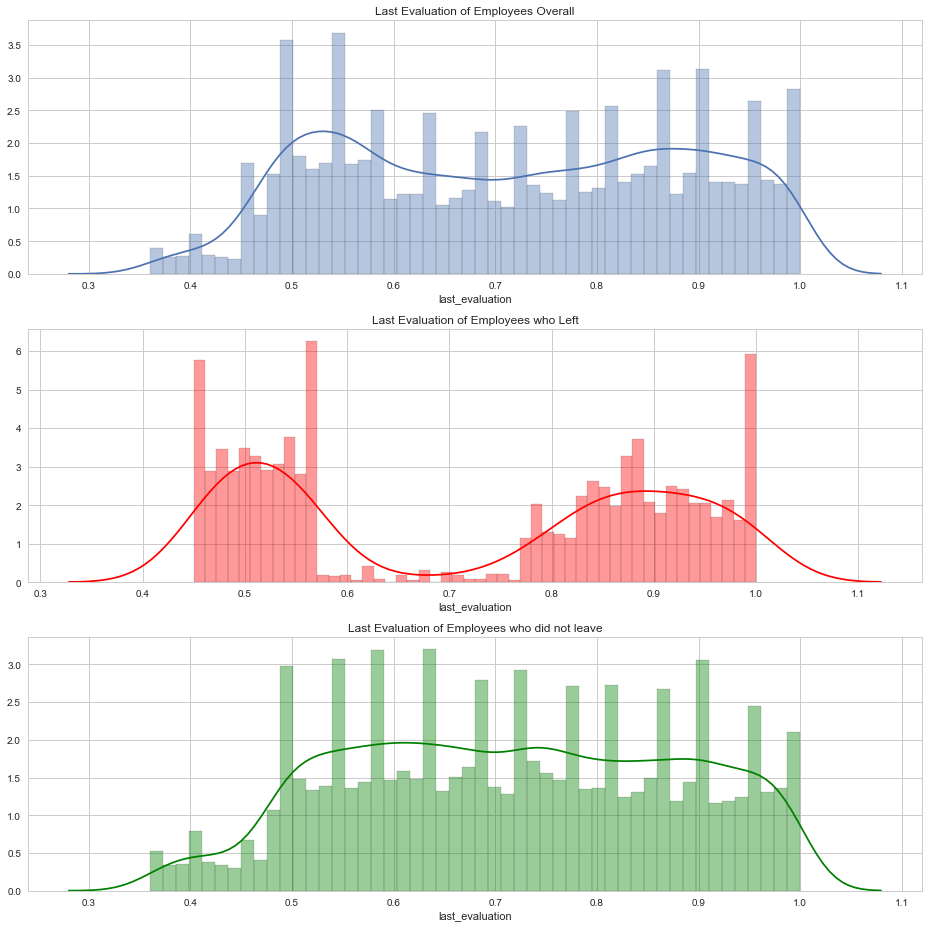

In [24]:
#Let's have a look at the distribution of last evalutaion for different groups of employees

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(13, 13))
sns.distplot(df_hr['last_evaluation'], bins=50, ax=ax1)
ax1.set_title('Last Evaluation of Employees Overall')

sns.distplot(df_hr_left['last_evaluation'], bins=50, color='red', ax=ax2)
ax2.set_title('Last Evaluation of Employees who Left')

sns.distplot(df_hr_not_left['last_evaluation'], bins=50, color='green', ax=ax3)
ax3.set_title('Last Evaluation of Employees who did not leave')

plt.tight_layout()

##### We can see that there is a pattern in the above graphs and the pattern is different for different groups of employees.

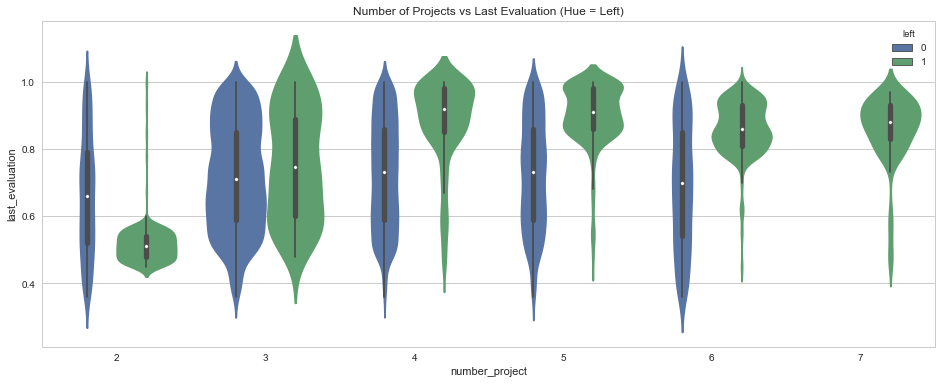

In [25]:
plt.figure(figsize=(16, 6))
sns.violinplot(x='number_project', y='last_evaluation', data=df_hr, hue='left')
plt.title('Number of Projects vs Last Evaluation (Hue = Left)')

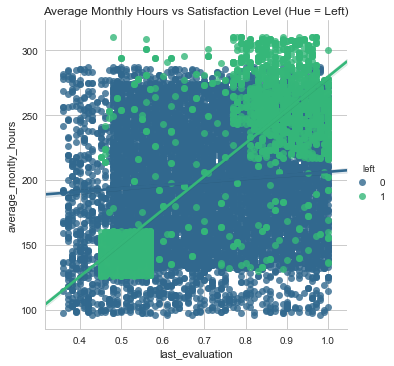

In [26]:
sns.lmplot(x='last_evaluation', y = 'average_montly_hours', hue='left', data=df_hr, palette='viridis')
plt.title('Average Monthly Hours vs Satisfaction Level (Hue = Left)')

##### We can observe clusters but no such linear relation.
1. Employees with higher *evalutaion* and *average monthly hours* tend to leave.
2. Employees with lower *evalutaion* and *average monthly hours* tend to leave.

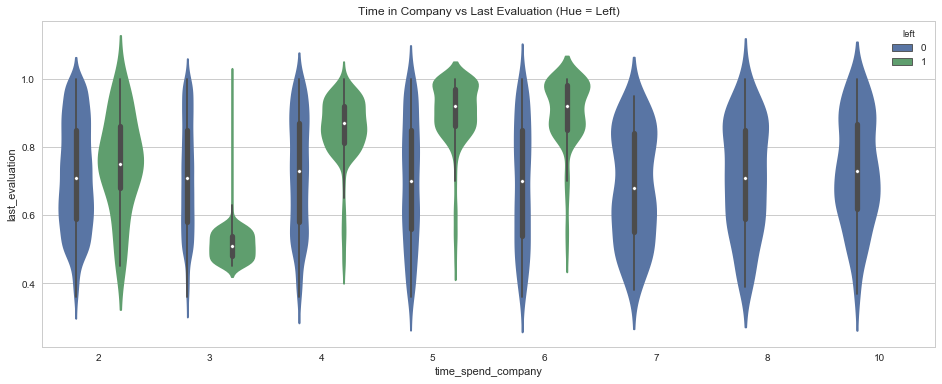

In [27]:
plt.figure(figsize=(16, 6))
sns.violinplot(x='time_spend_company', y='last_evaluation', data=df_hr, hue='left')
plt.title('Time in Company vs Last Evaluation (Hue = Left)')

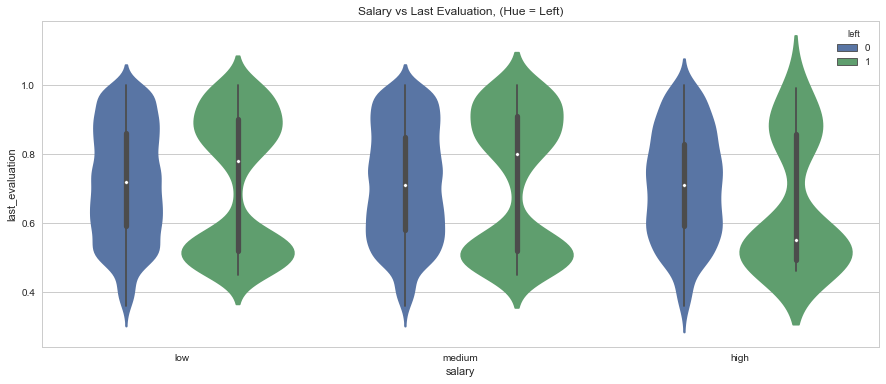

In [28]:
plt.figure(figsize=(15, 6))
sns.violinplot('salary', 'last_evaluation', data=pd.read_csv('Datasets/HR_comma_sep.csv'), hue='left')
plt.title('Salary vs Last Evaluation, (Hue = Left)')

##### We have ommitted violin plots for variables whose countplot or distplot did now show any distinct pattern difference between employees who left and employees who didn't leave

# Filter out Important Employees

### Now we pick out employees who are important based on their *Evaluation*

In [29]:
len(df_hr_left[df_hr_left['last_evaluation'] > df_hr['last_evaluation'].mean()])

1893

In [30]:
len(df_hr_left)

3571

##### Here we see that more than half of the employees who left have been highly evaluated. Now lets plot graphs for these employees wrt to those variables which showed distinct pattern for employees who left versus employees who did not leave

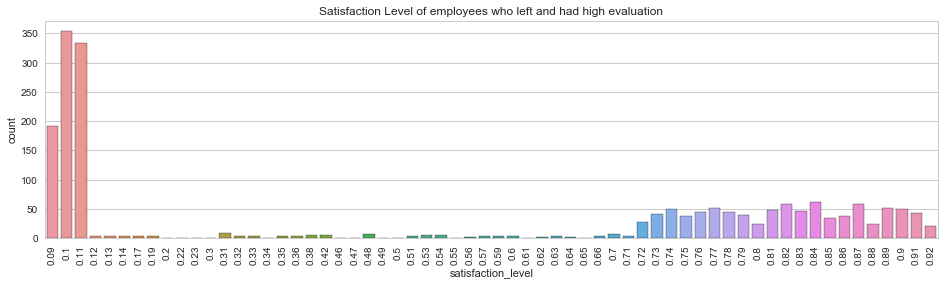

In [31]:
#Let's have a look at the distribution of satisfaction level for highly evaluated employees.

fig = plt.figure(figsize=(16, 4))
sns.countplot(df_hr_left['satisfaction_level'][df_hr_left['last_evaluation'] > df_hr['last_evaluation'].mean()])
plt.xticks(rotation=90)
plt.title('Satisfaction Level of employees who left and had high evaluation')

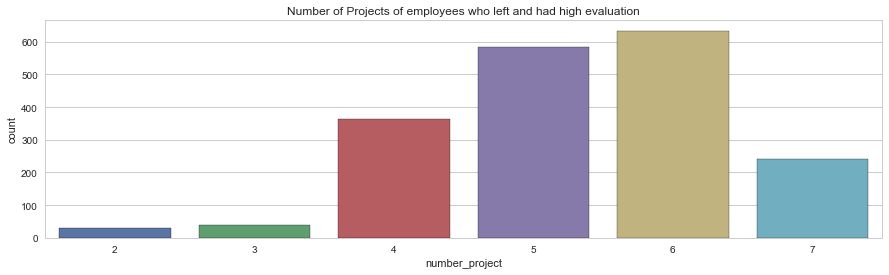

In [32]:
#Let's have a look at the distribution of number of projects for highly evaluated employees.

fig = plt.figure(figsize=(15, 4))
sns.countplot(df_hr_left['number_project'][df_hr_left['last_evaluation'] > df_hr['last_evaluation'].mean()])
plt.title('Number of Projects of employees who left and had high evaluation')

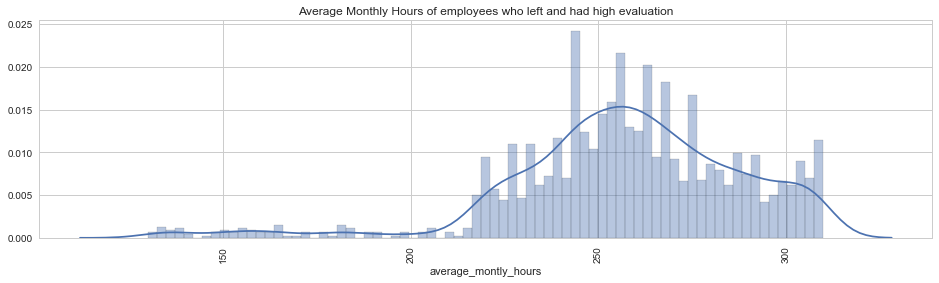

In [33]:
#Let's have a look at the distribution of average monthly hours for highly evaluated employees.

fig = plt.figure(figsize=(16, 4))
sns.distplot(df_hr_left['average_montly_hours'][df_hr_left['last_evaluation'] > df_hr['last_evaluation'].mean()], bins=75)
plt.xticks(rotation=90)
plt.title('Average Monthly Hours of employees who left and had high evaluation')

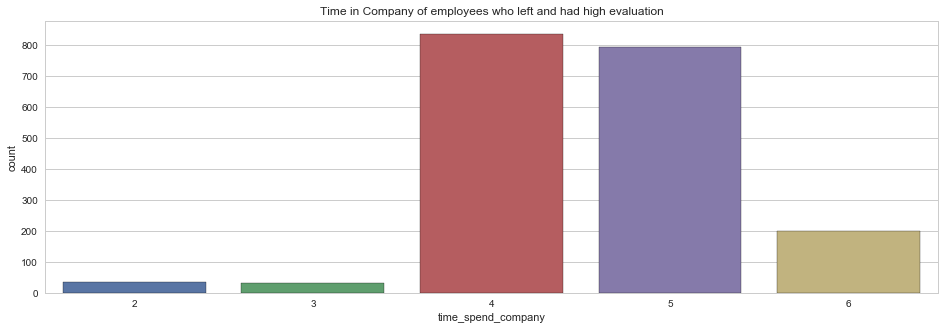

In [34]:
#Let's have a look at the distribution of time in company for highly evaluated employees.

fig = plt.figure(figsize=(16, 5))
sns.countplot(df_hr_left['time_spend_company'][df_hr_left['last_evaluation'] > df_hr['last_evaluation'].mean()])
plt.title('Time in Company of employees who left and had high evaluation')

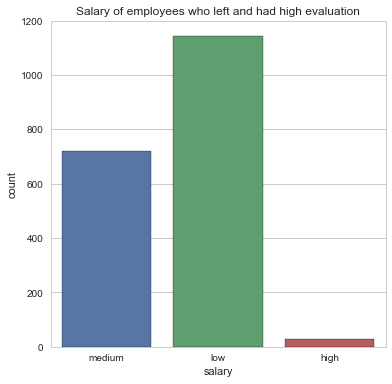

In [35]:
#Let's have a look at the distribution of salary for highly evaluated employees.

fig = plt.figure(figsize=(6, 6))
sns.countplot(df_hr['salary'][(df_hr['last_evaluation'] > df_hr['last_evaluation'].mean()) & (df_hr['left'] == 1)])
plt.title('Salary of employees who left and had high evaluation')

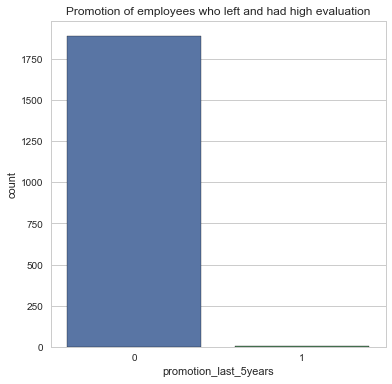

In [36]:
#Let's have a look at the distribution of promotion for highly evaluated employees.

fig = plt.figure(figsize=(6, 6))
sns.countplot(df_hr_left['promotion_last_5years'][df_hr_left['last_evaluation'] > df_hr['last_evaluation'].mean()])
plt.title('Promotion of employees who left and had high evaluation')

##### So we can now see the problem with highly evaluated employees who leave.
1. They have *lower* **satisfaction level**
2. They have *more* **number of projects**
3. They have *higher* **monthly hours**
4. They have also spent *more* **time in company**
5. They have *lower* **salary**
6. They have *not been* **promoted** in the last 5 years

# Machine Learning

### Let us find out the most important features using SelectKBest, a univariate feature selection method.
By default SelectKBest uses f-classif scoring function which computes ANOVA F-value for the given sample.

To use the F-test to determine whether group means are equal, it’s just a matter of including the correct variances in the ratio. In one-way ANOVA, the F-statistic is this ratio:
F = variation between sample means / variation within the samples

In [37]:
# mapping salaries to numerical values for machine learning purposes

map_salary = {'low': 0, 'medium': 1, 'high': 2} 
df_hr.replace({'salary': map_salary}, inplace=True)

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import scale

skb = SelectKBest(k='all') # 'all' because I need the scores and not a specific number of variables

In [39]:
df_hr_shuffle = df_hr.sample(frac=1, random_state=45) # shuffled as the target column had the employees 
                                                      # who left at the top and employees who didnt leave 
                                                      # after them in an order.

X = df_hr_shuffle.drop(['sales', 'left'], axis=1)
y = df_hr_shuffle['left']

In [40]:
X = scale(X) # it is always recommended to scale before applying to a machine learning model. One can experiment with different scales

model_skb = skb.fit(X, y)

In [41]:
feature_and_score = pd.DataFrame(data=model_skb.scores_, 
                                 index=df_hr_shuffle.drop(['sales', 'left'], axis=1).columns, 
                                 columns=['ANOVA F-value'])

feature_and_score = feature_and_score.sort_values(by='ANOVA F-value', axis=0, ascending=False)

feature_and_score

,ANOVA F-value
satisfaction_level,2663.881285
salary,383.461236
Work_accident,367.328044
time_spend_company,321.277313
average_montly_hours,76.601963
promotion_last_5years,57.474523
number_project,8.490559
last_evaluation,0.646805


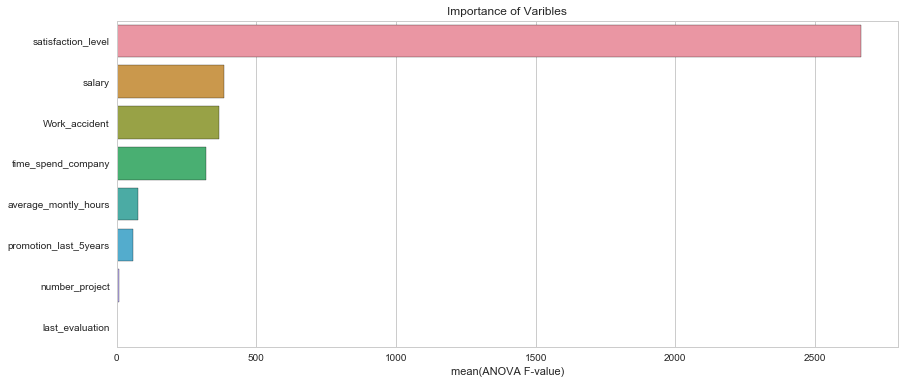

In [42]:
fig = plt.figure(figsize=(14, 6))
sns.barplot(x='ANOVA F-value', y=feature_and_score.index, data=feature_and_score)
plt.title('Importance of Varibles')

### Let us find out the most important features using SelectKBest, a univariate feature selection method for highly evaluated employees

In [43]:
df_hr_high_eval = df_hr[df_hr['last_evaluation'] > df_hr['last_evaluation'].mean()]

In [44]:
df_hr_shuffle_high_eval = df_hr_high_eval.sample(frac=1, random_state=45)
X_1 = df_hr_shuffle_high_eval.drop(['sales', 'left', 'last_evaluation'], axis=1)
y_1 = df_hr_shuffle_high_eval['left']

In [45]:
X_1 = scale(X_1)

In [46]:
model_skb_1 = skb.fit(X_1, y_1)

In [47]:
feature_and_score_high_eval = pd.DataFrame(data=model_skb_1.scores_, 
                                           index=df_hr_shuffle.drop(['sales', 'left', 'last_evaluation'], axis=1).columns, 
                                           columns=['ANOVA F-value'])

feature_and_score_high_eval = feature_and_score_high_eval.sort_values(by='ANOVA F-value', axis=0, ascending=False)

feature_and_score_high_eval

,ANOVA F-value
number_project,3224.899889
average_montly_hours,2383.689489
satisfaction_level,1008.854015
time_spend_company,995.544984
salary,203.146214
Work_accident,192.202128
promotion_last_5years,41.654703


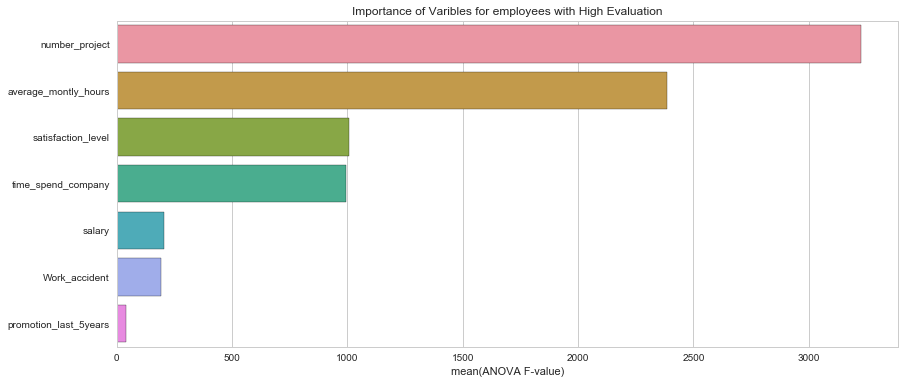

In [48]:
fig = plt.figure(figsize=(14, 6))
sns.barplot(x='ANOVA F-value', y=feature_and_score_high_eval.index, data=feature_and_score_high_eval)
plt.title('Importance of Varibles for employees with High Evaluation')

# Note:
##### The above done feature selection is univariate and not multivariate or tree-based and I will upgrade to those models once I have learned about it.

# Logistic Regression and SVC for all employees
###### Logistic Regression:
    In statistics, logistic regression is a regression model where the dependent/target variable is categorical. It a linear and less flexible model compared to Support Vector Machine
###### Support Vector Machine (Support Vector Classification)
    In machine learning, support vector machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. They can be more flexible than Logistic Regression depending in the kernel

In [49]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [50]:
X_lr = df_hr_shuffle.drop(['left', 'sales'], axis=1)
y_lr = df_hr_shuffle['left']

In [51]:
X_lr = preprocessing.scale(X_lr)

In [52]:
model_lr = LogisticRegression()
param_lr = {'C' : np.linspace(1, 10, 20)}

In [53]:
clf_lr = GridSearchCV(model_lr, param_lr, cv=5, return_train_score=False)

clf_lr.fit(X_lr, y_lr)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.     ,   1.47368,   1.94737,   2.42105,   2.89474,   3.36842,
         3.84211,   4.31579,   4.78947,   5.26316,   5.73684,   6.21053,
         6.68421,   7.15789,   7.63158,   8.10526,   8.57895,   9.05263,
         9.52632,  10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

In [54]:
print('Score for Logistic Regression is: {}'.format(round(clf_lr.best_score_, 5)))

Score for Logistic Regression is: 0.79339


In [55]:
from sklearn.svm import SVC

In [56]:
X_svc = df_hr_shuffle.drop(['left', 'sales'], axis=1)
y_svc = df_hr_shuffle['left']

In [57]:
X_svc = preprocessing.scale(X_svc)

##### Let's first have a look at which kernel is doing a better job and if it is on an average better than Logistic Regression so the 'C' values are spread out and less in quantity.

In [60]:
model_svc = SVC()
param_svc_1 = {'C' : np.linspace(1, 10, 10), 'kernel' : ['rbf', 'poly', 'linear', 'sigmoid']}

In [61]:
clf_svc_1 = GridSearchCV(model_svc, param_svc_1, cv=5, return_train_score=False)

clf_svc_1.fit(X_svc, y_svc)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]), 'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

In [62]:
print('Score for SVC_1 is: {}'.format(round(clf_svc_1.best_score_, 5)))

Score for SVC_1 is: 0.9708


##### We see that the SVC score is significantly higher that the Logistic Regression Score and so we will use this for further exploration

In [63]:
svc_results_1 = pd.DataFrame(data=clf_svc_1.cv_results_)

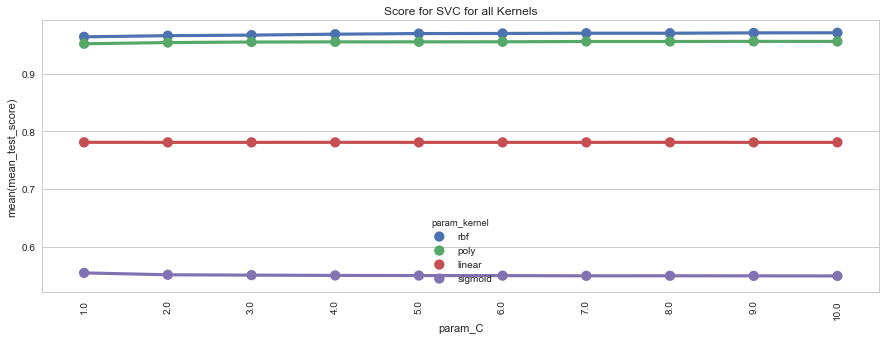

In [64]:
fig = plt.figure(figsize=(15, 5))
sns.pointplot(x='param_C', y='mean_test_score', data=svc_results_1, hue='param_kernel')
plt.xticks(rotation=90)
plt.title('Score for SVC for all Kernels')

##### Now only taking the 'rbf' and 'poly' kernels

In [65]:
param_svc_2 = {'C' : np.linspace(1, 30, 30), 'kernel' : ['rbf', 'poly']}

In [66]:
clf_svc_2 = GridSearchCV(model_svc, param_svc_2, cv=5, return_train_score=False)

clf_svc_2.fit(X_svc, y_svc)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.]), 'kernel': ['rbf', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

In [67]:
svc_results_2 = pd.DataFrame(data=clf_svc_2.cv_results_)

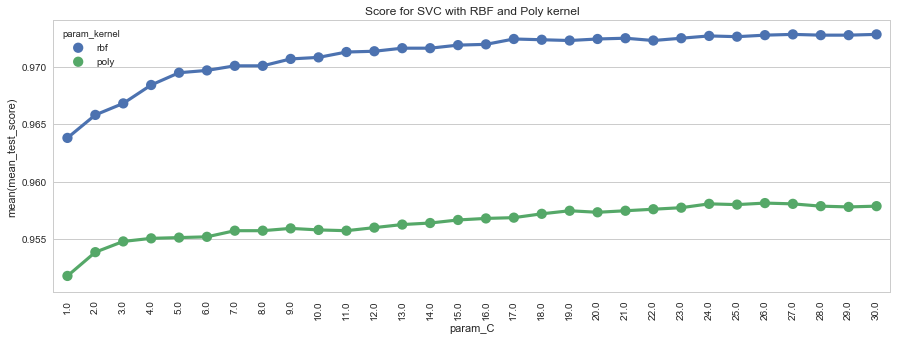

In [68]:
fig = plt.figure(figsize=(15, 5))
sns.pointplot(x='param_C', y='mean_test_score', data=svc_results_2, hue='param_kernel')
plt.xticks(rotation=90)
plt.title('Score for SVC with RBF and Poly kernel')

##### Now we only use the rbf kernel with extra values of 'C'  and 'gamma'

In [69]:
param_svc_3 = {'C' : np.exp2(np.arange(4, 8)), 'kernel' : ['rbf'], 'gamma' : np.exp2(np.arange(2, 7))}

In [70]:
clf_svc_3 = GridSearchCV(model_svc, param_svc_3, cv=5, return_train_score=False)

clf_svc_3.fit(X_svc, y_svc)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  16.,   32.,   64.,  128.]), 'gamma': array([  4.,   8.,  16.,  32.,  64.]), 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

In [71]:
svc_results_3 = pd.DataFrame(data=clf_svc_3.cv_results_)

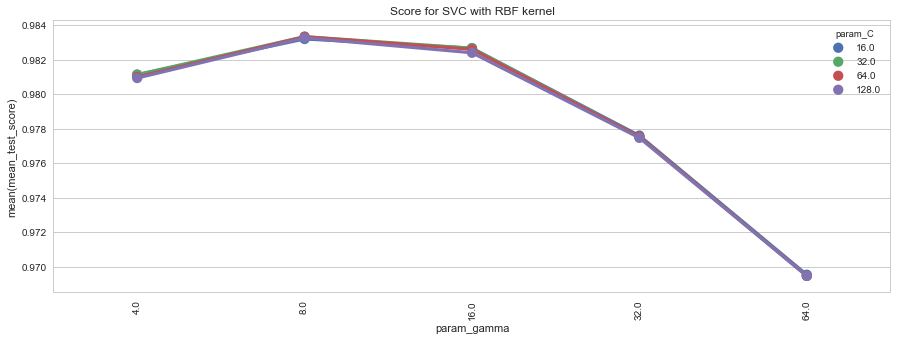

In [72]:
fig = plt.figure(figsize=(15, 5))
sns.pointplot(x='param_gamma', y='mean_test_score', data=svc_results_3, hue='param_C')
plt.xticks(rotation=90)
plt.title('Score for SVC with RBF kernel')

# Note:
#####  I did perform SVC multiple times to see in which range the prediction accuracy increases and then dips
##### Now lets further fine tune the parameters

In [73]:
param_svc_4 = {'C' : np.exp2(np.arange(4, 7)), 'kernel' : ['rbf'], 'gamma' : np.exp2(np.arange(2, 4.01, 0.25))}

In [74]:
clf_svc_4 = GridSearchCV(model_svc, param_svc_4, cv=5, return_train_score=False)

clf_svc_4.fit(X_svc, y_svc)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([ 16.,  32.,  64.]), 'gamma': array([  4.     ,   4.75683,   5.65685,   6.72717,   8.     ,   9.51366,
        11.31371,  13.45434,  16.     ]), 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

In [75]:
svc_results_4 = pd.DataFrame(data=clf_svc_4.cv_results_)

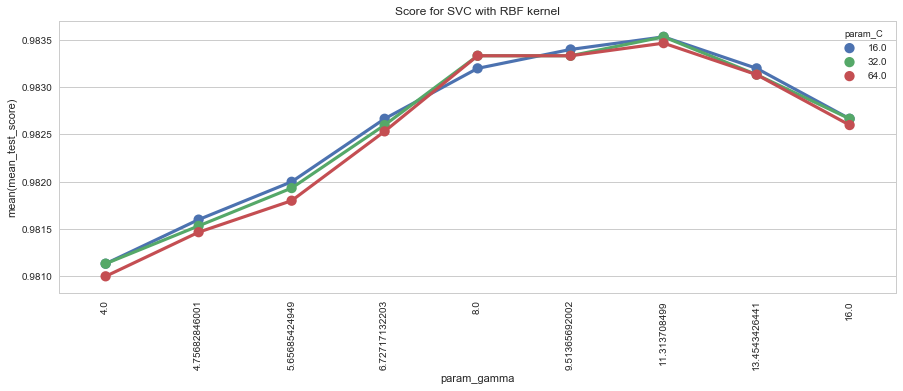

In [76]:
fig = plt.figure(figsize=(15, 5))
sns.pointplot(x='param_gamma', y='mean_test_score', data=svc_results_4, hue='param_C')
plt.xticks(rotation=90)
plt.title('Score for SVC with RBF kernel')

In [77]:
print('Score for final SVC on all employees is: {}'.format(round(clf_svc_4.best_score_, 5)))

Score for final SVC on all employees is: 0.98353


##### Now we will use this model for further exploration

In [78]:
predicted_values_svc_4 = pd.Series(clf_svc_4.predict(X_svc), index=y_svc.index)

In [79]:
emp_might_leave = []
for index in y_svc.index:
    if (predicted_values_svc_4.loc[index] == 1) and (y_svc.loc[index] == 0):
        emp_might_leave.append(index)

In [80]:
print('So the employees who might leave are employees with {} indexes.'.format(emp_might_leave))

So the employees who might leave are employees with [6466, 3780, 9781, 10098] indexes.


##### Like we did before, lets consider the highly evaluated empoyees and see who amongst them might leave

In [81]:
X_svc_high_eval = df_hr_shuffle_high_eval.drop(['left', 'sales'], axis=1)
y_svc_high_eval = df_hr_shuffle_high_eval['left']

X_svc_high_eval = preprocessing.scale(X_svc_high_eval)

In [82]:
param_svc_high_eval_1 = {'C': np.exp2(np.arange(-4, 10)), 'kernel': ['rbf'], 'gamma':np.exp2(np.arange(-15, 5))}

In [83]:
clf_svc_high_eval_1 = GridSearchCV(model_svc, param_svc_high_eval_1, cv=5, return_train_score=False)

clf_svc_high_eval_1.fit(X_svc_high_eval, y_svc_high_eval)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  6.25000e-02,   1.25000e-01,   2.50000e-01,   5.00000e-01,
         1.00000e+00,   2.00000e+00,   4.00000e+00,   8.00000e+00,
         1.60000e+01,   3.20000e+01,   6.40000e+01,   1.28000e+02,
         2.56000e+02,   5.12000e+02]), 'gamma': array([  3.05176e-05,   6.10352e-0...1.00000e+00,
         2.00000e+00,   4.00000e+00,   8.00000e+00,   1.60000e+01]), 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

In [84]:
svc_results_high_eval_1 = pd.DataFrame(data=clf_svc_high_eval_1.cv_results_)

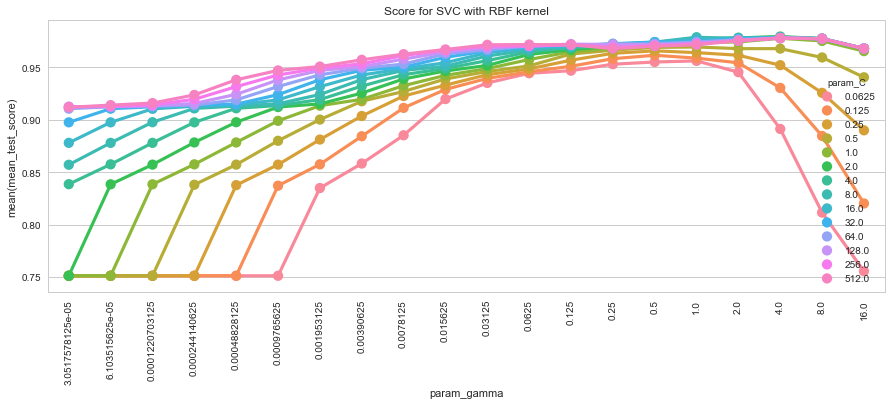

In [85]:
fig = plt.figure(figsize=(15, 5))
sns.pointplot(x='param_gamma', y='mean_test_score', data=svc_results_high_eval_1, hue='param_C')
plt.xticks(rotation=90)
plt.title('Score for SVC with RBF kernel')

In [86]:
param_svc_high_eval_2 = {'C': np.exp2(np.arange(0, 10)), 'kernel': ['rbf'], 'gamma':np.exp2(np.arange(1, 5))}

In [88]:
clf_svc_high_eval_2 = GridSearchCV(model_svc, param_svc_high_eval_2, cv=5, return_train_score=False)

clf_svc_high_eval_2.fit(X_svc_high_eval, y_svc_high_eval)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([   1.,    2.,    4.,    8.,   16.,   32.,   64.,  128.,  256.,  512.]), 'gamma': array([  2.,   4.,   8.,  16.]), 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

In [89]:
svc_results_high_eval_2 = pd.DataFrame(data=clf_svc_high_eval_2.cv_results_)

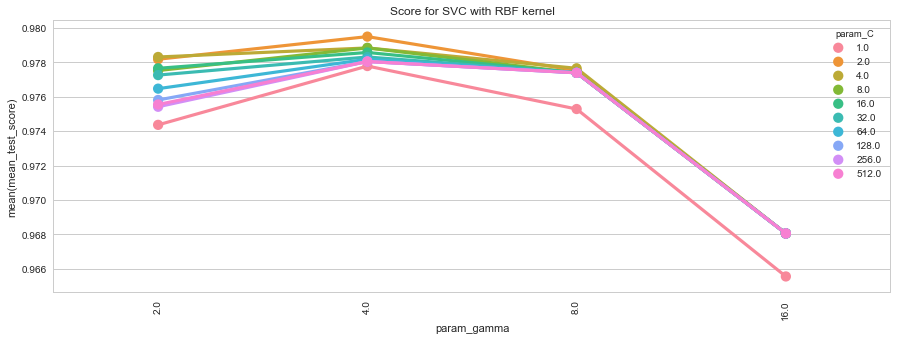

In [90]:
fig = plt.figure(figsize=(15, 5))
sns.pointplot(x='param_gamma', y='mean_test_score', data=svc_results_high_eval_2, hue='param_C')
plt.xticks(rotation=90)
plt.title('Score for SVC with RBF kernel')

##### Further fine tuning the parameters.

In [91]:
param_svc_high_eval_3 = {'C': np.exp2(np.arange(0, 5)), 'kernel': ['rbf'], 'gamma':np.exp2(np.arange(1, 3.1, .25))}

In [92]:
clf_svc_high_eval_3 = GridSearchCV(model_svc, param_svc_high_eval_3, cv=5, return_train_score=False)

clf_svc_high_eval_3.fit(X_svc_high_eval, y_svc_high_eval)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.,   2.,   4.,   8.,  16.]), 'gamma': array([ 2.     ,  2.37841,  2.82843,  3.36359,  4.     ,  4.75683,
        5.65685,  6.72717,  8.     ]), 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

In [93]:
svc_results_high_eval_3 = pd.DataFrame(data=clf_svc_high_eval_3.cv_results_)

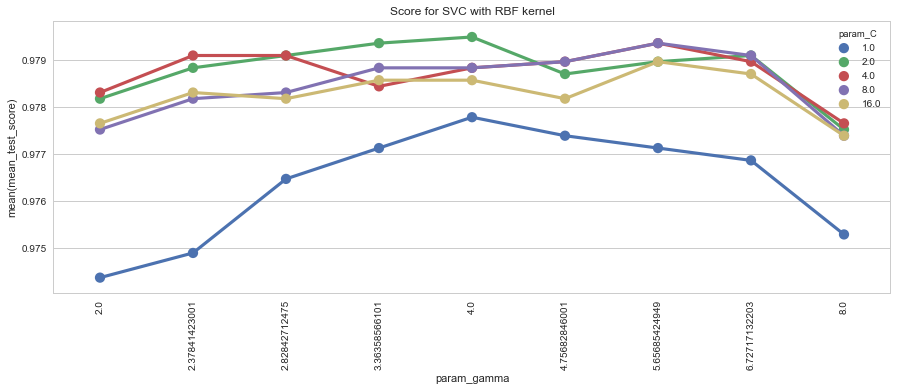

In [94]:
fig = plt.figure(figsize=(15, 5))
sns.pointplot(x='param_gamma', y='mean_test_score', data=svc_results_high_eval_3, hue='param_C')
plt.xticks(rotation=90)
plt.title('Score for SVC with RBF kernel')

In [95]:
print('Score for final SVC on employees with high evaluation is: {}'.format(round(clf_svc_high_eval_3.best_score_, 5)))

Score for final SVC on employees with high evaluation is: 0.97949


In [96]:
predicted_values_svc_high_eval_3 = pd.Series(clf_svc_high_eval_3.predict(X_svc_high_eval), index=y_svc_high_eval.index)

In [97]:
emp_might_leave_high_eval = []
for index in y_svc_high_eval.index:
    if (predicted_values_svc_high_eval_3.loc[index] == 1) and  (y_svc_high_eval.loc[index] == 0):
        emp_might_leave_high_eval.append(index)

In [98]:
print('So the employees with high evaluation who might leave are employees with {} indexes.'.format(emp_might_leave_high_eval))

So the employees with high evaluation who might leave are employees with [6263, 3780, 14191, 3038, 7762, 6358, 11980, 10294, 5847, 10098] indexes.
